# Homework 7 - Part A

*Note that there are two different notebooks for HW assignment 7. This is part A. There will be two different assignments in gradescope for each part. The deadlines are the same for both parts.*

## References

+ Lectures 24-26 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name:** Rohan
+ **Last Name:** Dekate
+ **Email:** dekate@purdue.edu

In this problem, you must use a deep neural network (DNN) to perform a regression task.
The dataset we are going to use is the [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#)
From this reference, the description of the dataset is as follows:

> The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.
>
> Attribute Information:
> This problem has the following inputs:
> 1. Frequency, in Hertzs.
> 2. The angle of attack, in degrees.
> 3. Chord length, in meters.
> 4. Free-stream velocity, in meters per second.
> 5. Suction side displacement thickness, in meters.

> The only output is:
> 6. Scaled sound pressure level in decibels.

You will have to do regression between the inputs and the output using a DNN.
Before we start, let's download and load the data.

In [2]:
!curl -O --insecure "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59984    0 59984    0     0   150k      0 --:--:-- --:--:-- --:--:--  150k


The data are in simple text format.
Here is how we can load them:

In [3]:
data = np.loadtxt('airfoil_self_noise.dat')
data

array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.26201e+02],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25201e+02],
       [1.25000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25951e+02],
       ...,
       [4.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06604e+02],
       [5.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06224e+02],
       [6.30000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.04204e+02]])

You may work directly with `data`, but, for your convenience, I am going to put them also in a nice Pandas DataFrame:

In [4]:
import pandas as pd
df = pd.DataFrame(data, columns=['Frequency', 'Angle_of_attack', 'Chord_length',
                                 'Velocity', 'Suction_thickness', 'Sound_pressure'])
df

,Frequency,Angle_of_attack,Chord_length,Velocity,Suction_thickness,Sound_pressure
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.6,0.052849,110.264
1499,3150.0,15.6,0.1016,39.6,0.052849,109.254
1500,4000.0,15.6,0.1016,39.6,0.052849,106.604
1501,5000.0,15.6,0.1016,39.6,0.052849,106.224


### Part A - Analyze the data visually

It is always a good idea to visualize the data before you start doing anything with them.

#### Part A.I. - Do the histograms of all variables
Use as many code segments as you need below to plot the histogram of each variable (all inputs and the output in separate plots)
Discuss whether or not you need to standardize the data before moving to regression.

**Answer:**
As all the variables in the given dataset have different units and scaling, standardization is required. From the histograms, it is clear that each variable is distributed as per a different distribution.

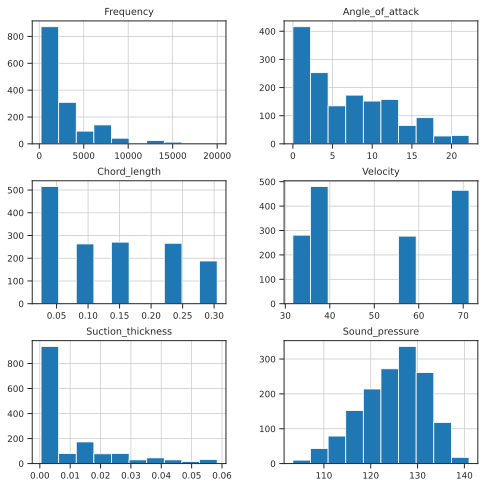

In [5]:
hist = df.hist(figsize=(8,8))

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frequency          1503 non-null   float64
 1   Angle_of_attack    1503 non-null   float64
 2   Chord_length       1503 non-null   float64
 3   Velocity           1503 non-null   float64
 4   Suction_thickness  1503 non-null   float64
 5   Sound_pressure     1503 non-null   float64
dtypes: float64(6)
memory usage: 70.6 KB


In [7]:
# Dataset statistics
df.describe()

,Frequency,Angle_of_attack,Chord_length,Velocity,Suction_thickness,Sound_pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


<Axes: >

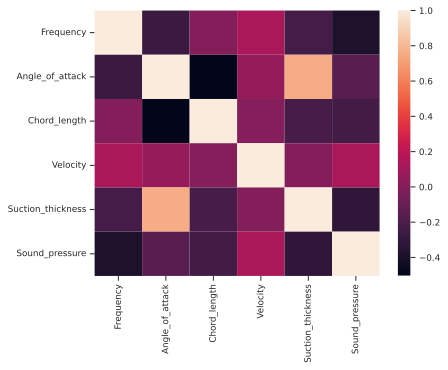

In [8]:
#Correlation plot
sns.heatmap(df.corr())

#### Part A.II - Do the scatter plots between all input variables

Do the scatter plot between all input variables. This will give you an idea of the range of experimental conditions.
Whatever model you build will only be valid inside the domain implicitly defined with your experimental conditions.
Are there any holes in the dataset, i.e., places where you have no data?

**Answer:**
From the scatter plots, it is observed that the dataset is banded and not continuous. So there are holes present in all input variables.

In [12]:
# Your code here
sns.pairplot(df,diag_kind="kde",kind="scatter",
             x_vars=["Frequency", "Angle_of_attack",	"Chord_length",	"Velocity",	"Suction_thickness"],
             y_vars=["Frequency", "Angle_of_attack",	"Chord_length",	"Velocity",	"Suction_thickness"])

Output hidden; open in https://colab.research.google.com to view.

#### Part A.III - Do the scatter plots between each input and the output

Do the scatter plot between each input variable and the output.
This will give you an idea of the functional relationship between the two.
Do you observe any obvious patterns?

**Answer:** There is no obvious pattern or trend visible in the plots below. The input variables are seen in bands as the values are discrete.

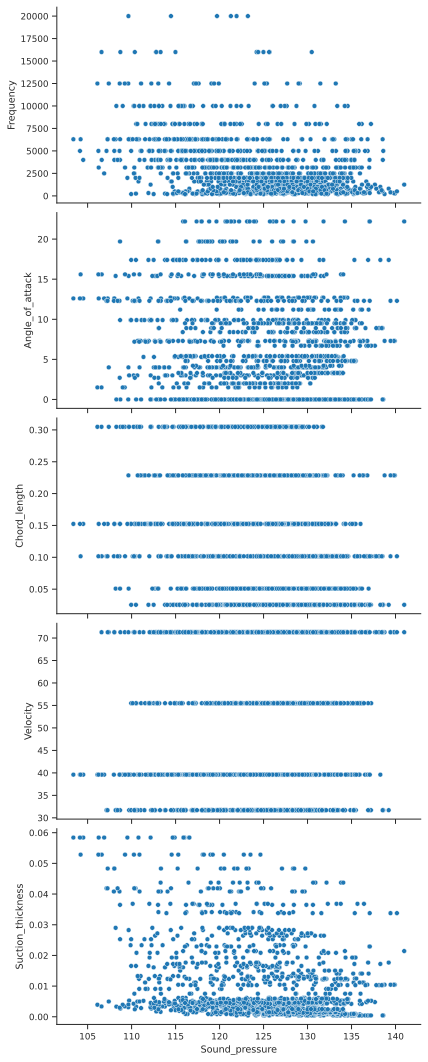

In [ ]:
# Your code here
sns.pairplot(df,kind="scatter",height=3,aspect=2,
             x_vars=["Sound_pressure"],
             y_vars=["Frequency", "Angle_of_attack",	"Chord_length",	"Velocity",	"Suction_thickness"])

### Part B - Use DNN to do regression

Let start by separating inputs and outputs for you:

In [ ]:
X = data[:, :-1]
y = data[:, -1][:, None]

#### Part B.I - Make the loss

Use standard torch functionality to create a function that gives you the sum of square error followed by an L2 regularization term for the weights and biases of all network parameters (remember that the L2 regularization is like putting a Gaussian prior on each parameter).
Follow the instructions below and fill in the missing code.

**Answer:**

In [ ]:
import torch
import torch.nn as nn

# Use standard torch functionality to define a function
# mse_loss(y_obs, y_pred) which gives you the mean of the sum of the square
# of the difference between y_obs and y_pred
# Hint: This is already implemented in PyTorch. You can just reuse it.
mse_loss = nn.MSELoss()# your code here

In [ ]:
# Test your code here
y_obs_tmp = np.random.randn(100, 1)
y_pred_tmp = np.random.randn(100, 1)
print('Your mse_loss: {0:1.2f}'.format(mse_loss(torch.Tensor(y_obs_tmp),
                                                torch.Tensor(y_pred_tmp))))
print('What you should be getting: {0:1.2f}'.format(np.mean((y_obs_tmp - y_pred_tmp) ** 2)))

Your mse_loss: 1.84
What you should be getting: 1.84


In [ ]:
# Now, we will create a regularization term for the loss
# I'm just going to give you this one:
def l2_reg_loss(params):
    """
    This needs an iterable object of network parameters.
    You can get it by doing `net.parameters()`.

    Returns the sum of the squared norms of all parameters.
    """
    l2_reg = torch.tensor(0.)
    for p in params:
        l2_reg += torch.norm(p) ** 2
    return l2_reg

In [ ]:
# Finally, let's add the two together to make a mean square error loss
# plus some weight (which we will call reg_weight) times the sum of the squared norms
# of all parameters.
# I give you the signature and you have to implement the rest of the code:
def loss_func(y_obs, y_pred, reg_weight, params):
    """
    Parameters:
    y_obs      -    The observed outputs
    y_pred     -    The predicted outputs
    reg_weight -    The regularization weight (a positive scalar)
    params     -    An iterable containing the parameters of the network

    Returns the sum of the MSE loss plus reg_weight times the sum of the squared norms of
    all parameters.
    """
    # Your code here
    loss = mse_loss(y_obs, y_pred)+reg_weight*l2_reg_loss(params)
    # raise NotImplementedError('Implement me and delete this line')
    return loss

In [ ]:
# You can try your final code here
# First, here is a dummy model
dummy_net = nn.Sequential(nn.Linear(10, 20),
                          nn.Sigmoid(),
                          nn.Linear(20, 1))
loss = loss_func(torch.Tensor(y_obs_tmp), torch.Tensor(y_pred_tmp),
                 0.0,
                 dummy_net.parameters())
print('The loss without regularization: {0:1.2f}'.format(loss.item()))
print('This should be the same as this: {0:1.2f}'.format(mse_loss(torch.Tensor(y_obs_tmp), torch.Tensor(y_pred_tmp))))
loss = loss_func(torch.Tensor(y_obs_tmp), torch.Tensor(y_pred_tmp),
                 0.01,
                 dummy_net.parameters())
print('The loss with regularization: {0:1.2f}'.format(loss.item()))

The loss without regularization: 1.84
This should be the same as this: 1.84
The loss with regularization: 1.92


#### Part B.III - Write flexible code to perform regression

When training neural networks, you must hand-pick many parameters, from the network structure to the activation functions to the regularization parameters to the details of the stochastic optimization.
Instead of mindlessly going through trial and error, it is better to think about the parameters you want to investigate (vary) and write code that allows you to train networks with all different parameter variations repeatedly.
In what follows, I will guide you through writing code for training an arbitrary regression network having the flexibility to:

- standardize the inputs and output or not
- experiment with various levels of regularization
- change the learning rate of the stochastic optimization algorithm
- change the batch size of the optimization algorithm
- change the number of epochs (how many times the optimization algorithm
  does a complete sweep through all the data.

**Answer:**

In [ ]:
# We will start by creating a class that encapsulates a regression
# network so that we can turn on or off input/output standardization
# without too much fuss.
# The class will represent a trained network model.
# It will "know" whether or not during training we standardized the data.
# I am not asking you to do anything here, so you can run this code segment
# or read through it if you want to know the details.
from sklearn.preprocessing import StandardScaler

class TrainedModel(object):
    """
    A class that represents a trained network model.
    The main reason I created this class is to encapsulate the standardization
    process in an excellent way.

    Parameters:

    net            -    A network.
    standardized -    True if the network expects standardized features and outputs
                        standardized targets. False otherwise.
    feature_scaler -    A feature scalar - Ala scikit.learn. Must have transform()
                        and inverse_transform() implemented.
    target_scaler  -    Similar to feature_scaler but for targets...
    """

    def __init__(self, net, standardized=False, feature_scaler=None, target_scaler=None):
        self.net = net
        self.standardized = standardized
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

    def __call__(self, X):
        """
        Evaluates the model at X.
        """
        # If not scaled, then the model is just net(X)
        if not self.standardized:
            return self.net(X)
        # Otherwise:
        # Scale X:
        X_scaled = self.feature_scaler.transform(X)
        # Evaluate the network output - which is also scaled:
        y_scaled = self.net(torch.Tensor(X_scaled))
        # Scale the output back:
        y = self.target_scaler.inverse_transform(y_scaled.detach().numpy())
        return y

In [ ]:
# Go through the code that follows and fill in the missing parts
from sklearn.model_selection import train_test_split
# We need this for a progress bar:
from tqdm import tqdm

def train_net(X, y, net, reg_weight, n_batch, epochs, lr, test_size=0.33,
              standardize=True):
    """
    A function that trains a regression neural network using stochastic gradient
    descent and returns the trained network. The loss function being minimized is
    `loss_func`.

    Arguments:

    X          -    The observed features
    y          -    The observed targets
    net        -    The network you want to fit
    n_batch    -    The batch size you want to use for stochastic optimization
    epochs     -    How many times do you want to pass over the training dataset.
    lr         -    The learning rate for the stochastic optimization algorithm.
    test_size  -    What percentage of the data should be used for testing (validation).
    standardize -    Whether or not you want to standardize the features and the targets.
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    # Standardize the data
    if standardize:
        # Build the scalers
        feature_scaler = StandardScaler().fit(X)
        target_scaler = StandardScaler().fit(y)
        # Get scaled versions of the data
        X_train_scaled = feature_scaler.transform(X_train)
        y_train_scaled = target_scaler.transform(y_train)
        X_test_scaled = feature_scaler.transform(X_test)
        y_test_scaled = target_scaler.transform(y_test)
    else:
        feature_scaler = None
        target_scaler = None
        X_train_scaled = X_train
        y_train_scaled = y_train
        X_test_scaled = X_test
        y_test_scaled = y_test

    # Turn all the numpy arrays to torch tensors
    X_train_scaled = torch.Tensor(X_train_scaled)
    X_test_scaled = torch.Tensor(X_test_scaled)
    y_train_scaled = torch.Tensor(y_train_scaled)
    y_test_scaled = torch.Tensor(y_test_scaled)

    # This is pytorch magic to enable shuffling of the
    # training data every time we go through them
    train_dataset = torch.utils.data.TensorDataset(X_train_scaled, y_train_scaled)
    train_data_loader = torch.utils.data.DataLoader(train_dataset,
                                                    batch_size=n_batch,
                                                    shuffle=True)

    # Create an Adam optimizing object for the neural network `net`
    # with learning rate `lr`

    optimizer = torch.optim.Adam(net.parameters(), lr=lr) # your code here

    # This is a place to keep track of the test loss
    test_loss = []
    training_loss = []

    # Iterate the optimizer.
    # Remember, each time we go through the entire dataset we complete an `epoch`
    # I have wrapped the range around tqdm to give you a nice progress bar
    # to look at
    for e in tqdm(range(epochs)):
        # This loop goes over all the shuffled training data
        # That's why the DataLoader class of PyTorch is convenient
        for X_batch, y_batch in train_data_loader:
            # Perform a single optimization step with loss function
            # loss_func(y_batch, y_pred, reg_weight, net.parameters())
            # Hint 1: You have defined loss_func() already
            # Hint 2: Consult the hands-on activities for an example
            # Your code here
            # Zero out the gradient buffers
            optimizer.zero_grad()
            # Make predictions
            y_pred = net(X_batch)
            # Evaluate the loss - That's what you are minimizing
            loss = loss_func(y_batch, y_pred,reg_weight, net.parameters())
            training_loss.append(loss.item())
            # Evaluate the derivative of the loss with respect to
            # all parameters - It knows how to do it because of
            # PyTorch magick
            loss.backward()
            # And now you are ready to make a step
            optimizer.step()

        # Evaluate the test loss and append it on the list `test_loss`
        y_pred_test = net(X_test_scaled)
        ts_loss = mse_loss(y_test_scaled, y_pred_test)
        test_loss.append(ts_loss.item())
        # Print the loss every one hundend iterations:
        if e % 100 == 0:
          print('it = {0:d}: val-loss = {1:1.2e}'.format(e, ts_loss.item()))
    print('it = {0:d}: val-loss = {1:1.2e}'.format(e, test_loss[-1]))

    # Make a TrainedModel
    trained_model = TrainedModel(net, standardized=standardize,
                                 feature_scaler=feature_scaler,
                                 target_scaler=target_scaler)

    # Make sure that we return properly scaled

    # Return everything we need to analyze the results
    return trained_model, test_loss, X_train, y_train, X_test, y_test

Use this to test your code:

In [ ]:
# A simple one-layer network with 10 neurons
net = nn.Sequential(nn.Linear(5, 10),
                    nn.Sigmoid(),
                    nn.Linear(10, 1))
epochs = 1000
lr = 0.01
reg_weight = 0
n_batch = 100
model, test_loss, X_train, y_train, X_test, y_test = train_net(
    X,
    y,
    net,
    reg_weight,
    n_batch,
    epochs,
    lr
)

  0%|          | 5/1000 [00:00<00:39, 25.39it/s]

it = 0: val-loss = 8.83e-01


 10%|█         | 105/1000 [00:03<00:26, 34.37it/s]

it = 100: val-loss = 3.03e-01


 20%|██        | 204/1000 [00:06<00:29, 27.30it/s]

it = 200: val-loss = 2.37e-01


 30%|███       | 305/1000 [00:10<00:22, 31.24it/s]

it = 300: val-loss = 1.99e-01


 40%|████      | 405/1000 [00:12<00:15, 38.51it/s]

it = 400: val-loss = 1.85e-01


 50%|█████     | 505/1000 [00:15<00:13, 37.49it/s]

it = 500: val-loss = 1.65e-01


 60%|██████    | 605/1000 [00:18<00:10, 36.00it/s]

it = 600: val-loss = 1.57e-01


 70%|███████   | 704/1000 [00:21<00:12, 23.01it/s]

it = 700: val-loss = 1.56e-01


 80%|████████  | 805/1000 [00:25<00:05, 35.14it/s]

it = 800: val-loss = 1.56e-01


 90%|█████████ | 905/1000 [00:27<00:02, 34.75it/s]

it = 900: val-loss = 1.53e-01


100%|██████████| 1000/1000 [00:30<00:00, 32.71it/s]

it = 999: val-loss = 1.52e-01


There are a few more things for you to do here.
First, plot the evolution of the test loss as a function of the number of epochs:

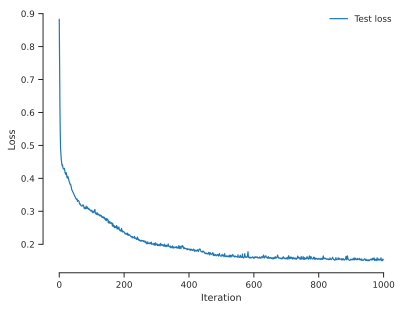

In [ ]:
# Your code here
fig, ax = plt.subplots(dpi=100)
# ax.plot(training_loss, label='Training loss')
ax.plot(test_loss, label='Test loss')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

Now plot the observations vs predictions plot for the training data:

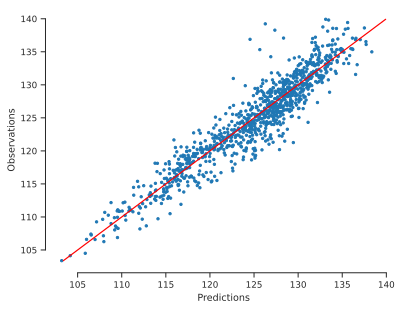

In [ ]:
# Your code here
y_pred_train = model(X_train)
fig, ax = plt.subplots(dpi=100)
ax.plot(y_pred_train, y_train, '.')
yys = np.linspace(y_train.min(), y_train.max(), 10)
ax.plot(yys, yys, 'r')
ax.set_xlabel('Predictions')
ax.set_ylabel('Observations')
sns.despine(trim=True);

And do the observations vs predictions plot for the test data:

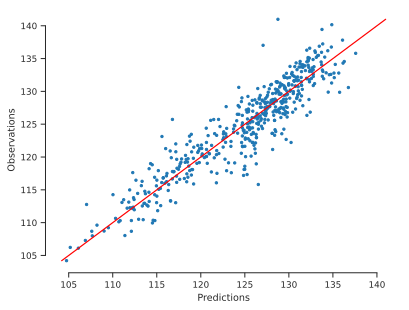

In [ ]:
# Your code here
y_pred_test = model(X_test)
fig, ax = plt.subplots(dpi=100)
ax.plot(y_pred_test, y_test, '.')
yys = np.linspace(y_test.min(), y_test.max(), 10)
ax.plot(yys, yys, 'r')
ax.set_xlabel('Predictions')
ax.set_ylabel('Observations')
sns.despine(trim=True);

#### Part C.I - Investigate the effect of the batch size

For the given network, try batch sizes of 10, 25, 50, and 100 for 400 epochs.
In the sample plot, show the evolution of the test loss function for each case.
Which batch sizes lead to faster training times and why?
Which one would you choose?

**Answer:**

In [ ]:
epochs = 400# pick me
lr = 1e-3# pick me
reg_weight = 0# pick me
test_losses = []
models = []
batches = [10,25,50,100]# make me a list with the right batch sizes
for n_batch in batches:
    print('Training n_batch: {0:d}'.format(n_batch))
    net = nn.Sequential(nn.Linear(5, 20),
                    nn.Sigmoid(),
                    nn.Linear(20, 1))
    model, test_loss, X_train, y_train, X_test, y_test = train_net(
        X,
        y,
        net,
        reg_weight,
        n_batch,
        epochs,
        lr
    )
    test_losses.append(test_loss)
    models.append(model)

Training n_batch: 10


  0%|          | 1/400 [00:00<01:14,  5.39it/s]

it = 0: val-loss = 9.11e-01


 25%|██▌       | 101/400 [00:19<01:11,  4.19it/s]

it = 100: val-loss = 3.57e-01


 50%|█████     | 202/400 [00:39<00:35,  5.62it/s]

it = 200: val-loss = 2.72e-01


 76%|███████▌  | 302/400 [00:58<00:17,  5.68it/s]

it = 300: val-loss = 2.37e-01


100%|██████████| 400/400 [01:20<00:00,  4.99it/s]


it = 399: val-loss = 2.06e-01
Training n_batch: 25


  0%|          | 2/400 [00:00<00:28, 13.95it/s]

it = 0: val-loss = 1.03e+00


 26%|██▌       | 102/400 [00:08<00:23, 12.45it/s]

it = 100: val-loss = 4.77e-01


 51%|█████     | 203/400 [00:17<00:15, 12.81it/s]

it = 200: val-loss = 3.93e-01


 76%|███████▌  | 302/400 [00:26<00:11,  8.90it/s]

it = 300: val-loss = 3.44e-01


100%|██████████| 400/400 [00:34<00:00, 11.67it/s]


it = 399: val-loss = 3.11e-01
Training n_batch: 50


  1%|          | 3/400 [00:00<00:18, 22.02it/s]

it = 0: val-loss = 1.09e+00


 26%|██▌       | 104/400 [00:05<00:19, 14.82it/s]

it = 100: val-loss = 3.96e-01


 51%|█████     | 204/400 [00:10<00:08, 21.93it/s]

it = 200: val-loss = 3.30e-01


 76%|███████▌  | 303/400 [00:15<00:04, 21.83it/s]

it = 300: val-loss = 2.97e-01


100%|██████████| 400/400 [00:21<00:00, 18.98it/s]


it = 399: val-loss = 2.73e-01
Training n_batch: 100


  0%|          | 2/400 [00:00<00:21, 18.58it/s]

it = 0: val-loss = 1.02e+00


 26%|██▋       | 105/400 [00:03<00:08, 34.11it/s]

it = 100: val-loss = 4.46e-01


 51%|█████▏    | 205/400 [00:06<00:05, 33.82it/s]

it = 200: val-loss = 4.20e-01


 76%|███████▋  | 305/400 [00:08<00:02, 36.27it/s]

it = 300: val-loss = 3.80e-01


100%|██████████| 400/400 [00:12<00:00, 31.98it/s]

it = 399: val-loss = 3.48e-01


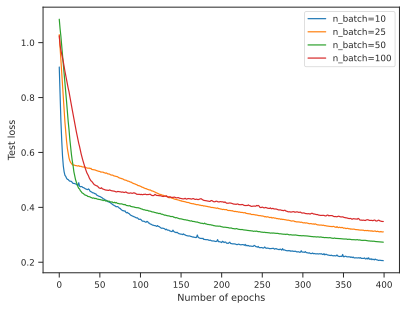

In [ ]:
fig, ax = plt.subplots(dpi=100)
for tl, n_batch in zip(test_losses, batches):
    ax.plot(tl, label='n_batch={0:d}'.format(n_batch))
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss')
plt.legend(loc='best');

*Write your observsations about the batch size here*
* Smaller batch sizes requires more time for training.
* Batch size of 100 trains faster than smaller batch sizes as in each batch more number of training samples are evaluated by the neural network.
* However, smaller batch size yields lower test loss.
* There is a trade-off between test loss and training time. The test loss for batch size 25 and 50 are similar and they train faster than batch size of 10. Hence one can choose either of these batch sizes for training.
* For this example I'll choose batch size of 50 as the training time is faster than batch size of 10 and the test loss is not far off.

#### Part C.II - Investigate the effect of the learning rate

Fix the batch size to the best one you identified in Part C.I.
For the given network, try learning rates of 1, 0.1, 0.01, and 0.001 for 400 epochs.
In the sample plot, show the evolution of the test loss function for each case.
Does the algorithm converge for all learning rates?
Which learning rate would you choose?

**Answer:**

In [ ]:
# your code here
epochs = 400# pick me
learning_rates = [1,0.1,0.01,0.001]
reg_weight = 0# pick me
test_losses = []
models = []
n_batch = 50
for lr in learning_rates:
    print(f'Training with Learning Rate: {lr}')
    net = nn.Sequential(nn.Linear(5, 20),
                    nn.Sigmoid(),
                    nn.Linear(20, 1))
    model, test_loss, X_train, y_train, X_test, y_test = train_net(
        X,
        y,
        net,
        reg_weight,
        n_batch,
        epochs,
        lr
    )
    test_losses.append(test_loss)
    models.append(model)

Training with Learning Rate: 1


  0%|          | 2/400 [00:00<00:26, 15.21it/s]

it = 0: val-loss = 2.03e+00


 26%|██▌       | 103/400 [00:05<00:13, 22.42it/s]

it = 100: val-loss = 3.50e-01


 51%|█████▏    | 205/400 [00:09<00:08, 22.43it/s]

it = 200: val-loss = 3.54e-01


 76%|███████▌  | 304/400 [00:15<00:06, 14.88it/s]

it = 300: val-loss = 6.18e-01


100%|██████████| 400/400 [00:19<00:00, 20.09it/s]


it = 399: val-loss = 3.50e-01
Training with Learning Rate: 0.1


  1%|          | 3/400 [00:00<00:18, 22.04it/s]

it = 0: val-loss = 6.13e-01


 26%|██▌       | 104/400 [00:05<00:14, 20.47it/s]

it = 100: val-loss = 1.45e-01


 51%|█████     | 203/400 [00:11<00:09, 21.72it/s]

it = 200: val-loss = 1.23e-01


 76%|███████▋  | 305/400 [00:15<00:04, 21.51it/s]

it = 300: val-loss = 1.07e-01


100%|██████████| 400/400 [00:20<00:00, 19.80it/s]


it = 399: val-loss = 1.33e-01
Training with Learning Rate: 0.01


  0%|          | 2/400 [00:00<00:25, 15.75it/s]

it = 0: val-loss = 8.05e-01


 26%|██▌       | 104/400 [00:06<00:13, 22.04it/s]

it = 100: val-loss = 2.08e-01


 51%|█████     | 203/400 [00:10<00:08, 22.77it/s]

it = 200: val-loss = 1.44e-01


 76%|███████▌  | 304/400 [00:15<00:06, 15.09it/s]

it = 300: val-loss = 1.24e-01


100%|██████████| 400/400 [00:20<00:00, 19.09it/s]


it = 399: val-loss = 1.18e-01
Training with Learning Rate: 0.001


  1%|          | 3/400 [00:00<00:18, 21.33it/s]

it = 0: val-loss = 9.12e-01


 26%|██▋       | 105/400 [00:04<00:12, 22.76it/s]

it = 100: val-loss = 4.51e-01


 51%|█████     | 203/400 [00:09<00:12, 15.47it/s]

it = 200: val-loss = 4.07e-01


 76%|███████▌  | 303/400 [00:15<00:04, 22.66it/s]

it = 300: val-loss = 3.56e-01


100%|██████████| 400/400 [00:19<00:00, 20.62it/s]

it = 399: val-loss = 3.12e-01


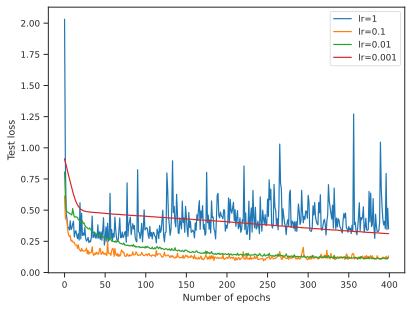

In [ ]:
fig, ax = plt.subplots(dpi=100)
for tl, lr in zip(test_losses, learning_rates):
    ax.plot(tl, label='lr={}'.format(lr))
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss')
plt.legend(loc='best');

* The test loss oscillates a lot for lr=1. It does not converge.
* For other learning rates it is observed that the test loss does converge at some minima.
* I will choose lr=0.01 as the test loss is lowest and the curve is also smooth compared to lr=0.1.

#### Part C.III - Investigate the effect of the regularization weight

Fix the batch size to the value you selected in C.I and the learning rate to the value you selected in C.II.
For the given network, try regularization weights of 0, 1e-16, 1e-12, 1e-6, and 1e-3 for 400 epochs.
In the sample plot, show the evolution of the test loss function for each case.
Which regularization weight seems to be the best and why?

**Answer:**

In [ ]:
# Your code here
epochs = 400# pick me
lr = 0.01
reg_weight = [0,1e-16,1e-12,1e-6,1e-3]
test_losses = []
models = []
n_batch = 50
for rw in reg_weight:
    print(f'Training with Regularization Weight: {rw}')
    net = nn.Sequential(nn.Linear(5, 20),
                    nn.Sigmoid(),
                    nn.Linear(20, 1))
    model, test_loss, X_train, y_train, X_test, y_test = train_net(
        X,
        y,
        net,
        rw,
        n_batch,
        epochs,
        lr
    )
    test_losses.append(test_loss)
    models.append(model)

Training with Regularization Weight: 0


  0%|          | 2/400 [00:00<00:21, 18.94it/s]

it = 0: val-loss = 8.06e-01


 26%|██▌       | 103/400 [00:05<00:19, 15.57it/s]

it = 100: val-loss = 2.12e-01


 50%|█████     | 202/400 [00:10<00:09, 21.59it/s]

it = 200: val-loss = 1.44e-01


 76%|███████▌  | 304/400 [00:15<00:04, 21.74it/s]

it = 300: val-loss = 1.17e-01


100%|██████████| 400/400 [00:21<00:00, 18.94it/s]


it = 399: val-loss = 1.06e-01
Training with Regularization Weight: 1e-16


  1%|          | 3/400 [00:00<00:17, 22.11it/s]

it = 0: val-loss = 8.86e-01


 26%|██▌       | 103/400 [00:04<00:13, 21.45it/s]

it = 100: val-loss = 2.00e-01


 51%|█████▏    | 205/400 [00:09<00:08, 22.78it/s]

it = 200: val-loss = 1.28e-01


 76%|███████▋  | 305/400 [00:15<00:04, 21.19it/s]

it = 300: val-loss = 1.15e-01


100%|██████████| 400/400 [00:19<00:00, 20.21it/s]


it = 399: val-loss = 1.17e-01
Training with Regularization Weight: 1e-12


  0%|          | 2/400 [00:00<00:20, 19.50it/s]

it = 0: val-loss = 6.38e-01


 26%|██▌       | 103/400 [00:04<00:16, 17.98it/s]

it = 100: val-loss = 2.01e-01


 51%|█████     | 203/400 [00:11<00:09, 21.81it/s]

it = 200: val-loss = 1.35e-01


 76%|███████▋  | 305/400 [00:15<00:04, 22.39it/s]

it = 300: val-loss = 1.18e-01


100%|██████████| 400/400 [00:20<00:00, 19.21it/s]


it = 399: val-loss = 1.09e-01
Training with Regularization Weight: 1e-06


  0%|          | 2/400 [00:00<00:25, 15.50it/s]

it = 0: val-loss = 7.49e-01


 26%|██▌       | 103/400 [00:05<00:13, 21.95it/s]

it = 100: val-loss = 2.07e-01


 51%|█████▏    | 205/400 [00:10<00:09, 21.62it/s]

it = 200: val-loss = 1.47e-01


 76%|███████▌  | 304/400 [00:15<00:06, 15.42it/s]

it = 300: val-loss = 1.20e-01


100%|██████████| 400/400 [00:20<00:00, 19.74it/s]


it = 399: val-loss = 1.09e-01
Training with Regularization Weight: 0.001


  1%|          | 3/400 [00:00<00:17, 22.30it/s]

it = 0: val-loss = 7.10e-01


 26%|██▋       | 105/400 [00:04<00:12, 22.83it/s]

it = 100: val-loss = 2.97e-01


 50%|█████     | 202/400 [00:10<00:13, 14.51it/s]

it = 200: val-loss = 2.77e-01


 76%|███████▋  | 305/400 [00:15<00:04, 21.47it/s]

it = 300: val-loss = 2.68e-01


100%|██████████| 400/400 [00:19<00:00, 20.48it/s]

it = 399: val-loss = 2.55e-01


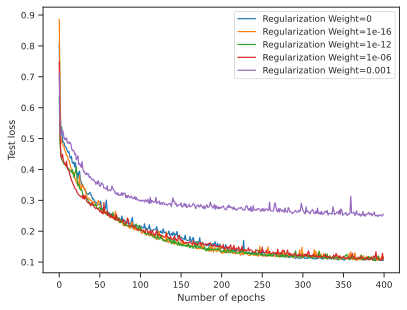

In [ ]:
fig, ax = plt.subplots(dpi=100)
for tl, rw in zip(test_losses, reg_weight):
    ax.plot(tl, label='Regularization Weight={}'.format(rw))
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss')
plt.legend(loc='best');

* In order to prevent over-fitting of the network to the training samples, regularization is necessary.
* With regularization weight of 0, the model overfits and the same is the case with very small values like 1e-16.
* But with 0.001, we don't get a low test loss value and it shows under-fitting.
* Thus, I'll choose 1e-06 as the regularization weight as it gets me close to the lowest possible test-loss and does not overfit or underfit.

#### Part D.I - Train a bigger network

You have developed some intuition about the parameters involved in training a network. Now, let's train a larger one.
In particular, use a 5-layer deep network with 100 neurons per layer.
You can use the sigmoid activation function, or you can change it to something else.
Make sure you plot:
- the evolution of the test loss as a function of the epochs
- the observations vs predictions plot for the test data

**Answer:**

In [ ]:
# your code here
net = nn.Sequential(nn.Linear(5, 100),
                    nn.Sigmoid(),
                    nn.Linear(100, 100), # Layer 1
                    nn.Sigmoid(),
                    nn.Linear(100, 100), # Layer 2
                    nn.Sigmoid(),
                    nn.Linear(100, 100), # Layer 3
                    nn.Sigmoid(),
                    nn.Linear(100, 100), # Layer 4
                    nn.Sigmoid(),
                    nn.Linear(100, 1)) # Layer 5
print(net)
epochs = 400
lr = 0.01
reg_weight = 1e-6
n_batch = 50
model, test_loss, X_train, y_train, X_test, y_test = train_net(
    X,
    y,
    net,
    reg_weight,
    n_batch,
    epochs,
    lr
)

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=100, out_features=1, bias=True)
)


  0%|          | 1/400 [00:00<00:45,  8.68it/s]

it = 0: val-loss = 1.09e+00


 26%|██▌       | 102/400 [00:11<00:29, 10.05it/s]

it = 100: val-loss = 9.70e-02


 50%|█████     | 202/400 [00:23<00:18, 10.47it/s]

it = 200: val-loss = 7.14e-02


 76%|███████▌  | 302/400 [00:34<00:13,  7.03it/s]

it = 300: val-loss = 7.81e-02


100%|██████████| 400/400 [00:44<00:00,  8.90it/s]

it = 399: val-loss = 7.06e-02


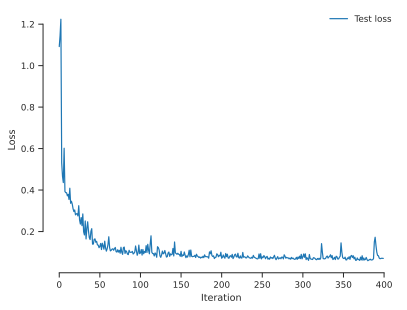

In [ ]:
# Your code here
fig, ax = plt.subplots(dpi=100)
# ax.plot(training_loss, label='Training loss')
ax.plot(test_loss, label='Test loss')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

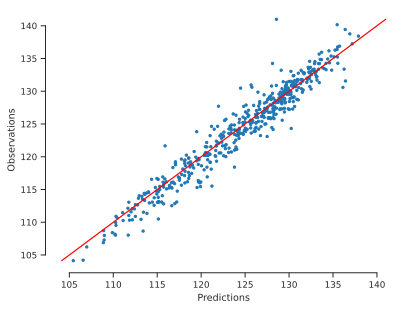

In [ ]:
# Your code here
y_pred_test = model(X_test)
fig, ax = plt.subplots(dpi=100)
ax.plot(y_pred_test, y_test, '.')
yys = np.linspace(y_test.min(), y_test.max(), 10)
ax.plot(yys, yys, 'r')
ax.set_xlabel('Predictions')
ax.set_ylabel('Observations')
sns.despine(trim=True);

#### Part D.II - Make a prediction

Visualize the scaled sound level as a function of the stream velocity for a fixed frequency of 2500 Hz, a chord length of 0.1 m, a suction side displacement thickness of 0.01 m, and an angle of attack of 0, 5, and 10 degrees.

**Answer:**

This is just a check for your model.
You will have to run the following code segments for the best model you have found.

In [ ]:
best_model = model# set this equal to your best model

def plot_sound_level_as_func_of_stream_vel(
    freq=2500,
    angle_of_attack=10,
    chord_length=0.1,
    suc_side_disp_thick=0.01,
    ax=None,
    label=None
):

    if ax is None:
        fig, ax = plt.subplots(dpi=100)

    # The velocities on which we want to evaluate the model
    vel = np.linspace(X[:, 3].min(), X[:, 3].max(), 100)[:, None]

    # Make the input for the model
    freqs = freq * np.ones(vel.shape)
    angles = angle_of_attack * np.ones(vel.shape)
    chords = chord_length * np.ones(vel.shape)
    sucs = suc_side_disp_thick * np.ones(vel.shape)

    # Put all these into a single array
    XX = np.hstack([freqs, angles, chords, vel, sucs])

    ax.plot(vel, best_model(XX), label=label)

    ax.set_xlabel('Velocity (m/s)')
    ax.set_ylabel('Scaled sound pressure level (decibels)')

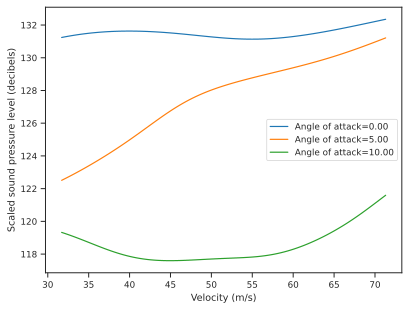

In [ ]:
fig, ax = plt.subplots(dpi=100)
for aofa in [0, 5, 10]:
    plot_sound_level_as_func_of_stream_vel(
        angle_of_attack=aofa,
        ax=ax,
        label='Angle of attack={0:1.2f}'.format(aofa)
)
plt.legend(loc='best');

$\pagebreak$

## Problem 2 - Classification with DNNs

[Dr. Ali Lenjani](https://scholar.google.com/citations?user=vVPC7g0AAAAJ&hl=en) kindly provided this homework problem.
It is based on our joint work on this paper:
[Hierarchical convolutional neural networks information fusion for activity source detection in smart buildings](http://www.dpi-proceedings.com/index.php/shm2019/article/view/32353).
The data come from the [Human Activity Benchmark](http://www.ce.sc.edu/#/caicedo/custom?title=Human%20Activity%20Benchmark) published by Dr. Juan M. Caicedo.

So the problem is as follows.
You want to put sensors on a building so that it can figure out what is going on inside it.
This has applications in industrial facilities (e.g., detecting if there was an accident), public infrastructure, hospitals (e.g., did a patient fall off a bed), etc.
Typically, the problem is addressed using cameras.
Instead of cameras, we will investigate the ability of acceleration sensors to tell us what is going on.

Four acceleration sensors have been placed in different locations in the benchmark building to record the floor vibration signals of other objects falling from several heights.
A total of seven cases cases were considered:

- **bag-high:** 450 g bag containing plastic pieces is dropped roughly from 2.10 m
- **bag-low:** 450 g bag containing plastic pieces is dropped roughly from 1.45 m
- **ball-high:** 560 g basketball is dropped roughly from 2.10 m
- **ball-low:** 560 g basketball is dropped roughly from 1.45 m
- **j-jump:** person 1.60 m tall, 55 kg jumps approximately 12 cm high
- **d-jump:** person 1.77 m tall, 80 kg jumps approximately 12 cm high
- **w-jump:** person 1.85 m tall, 85 kg jumps approximately 12 cm high

Each of these seven cases was repeated 115 times at five different building locations.
The original data are [here](http://www.ce.sc.edu/#/caicedo/custom?title=Human%20Activity%20Benchmark), but I have repackaged them for you in a more convenient format.
Let's download them:

In [ ]:
!curl -O 'https://dl.dropboxusercontent.com/s/n8dczk7t8bx0pxi/human_activity_data.npz'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  203M  100  203M    0     0  57.2M      0  0:00:03  0:00:03 --:--:-- 57.2M


Here is how to load the data:

In [ ]:
data = np.load('human_activity_data.npz')

This is a Python dictionary that contains the following entries:

In [ ]:
for key in data.keys():
    print(key, ':', data[key].shape)

features : (4025, 4, 3305)
labels_1 : (4025,)
labels_2 : (4025,)
loc_ids : (4025,)


Let's go over these one by one. First, the `features`.
These are the accelertion sensor measurements.
Here is how you visualize them:

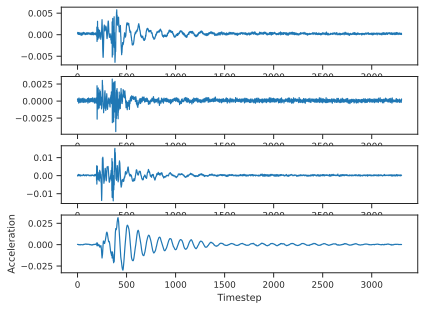

In [ ]:
fig, ax = plt.subplots(4, 1, dpi=100)
# Loop over sensors
for j in range(4):
        ax[j].plot(data['features'][0, j])
ax[-1].set_xlabel('Timestep')
ax[-1].set_ylabel('Acceleration');

The second key, `labels_1`, is a bunch of integers ranging from 0 to 2 indicating whether the entry corresponds to a "bag," a "ball" or a "jump."
For your reference, the correspondence is:

In [ ]:
LABELS_1_TO_TEXT = {
    0: 'bag',
    1: 'ball',
    2: 'jump'
}

And here are a few examples:

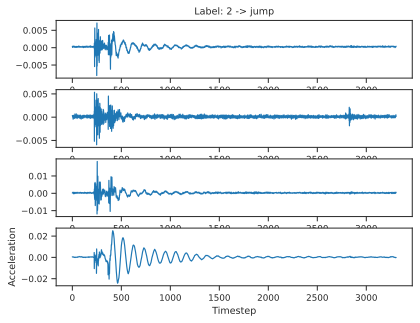

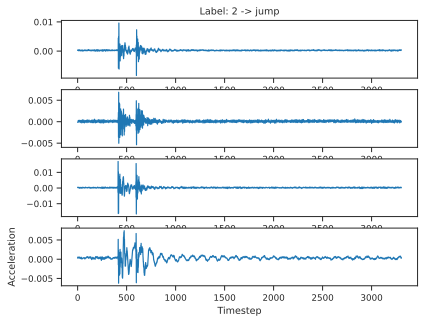

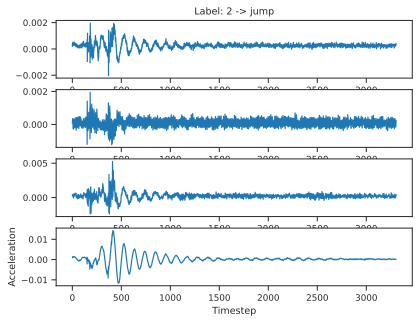

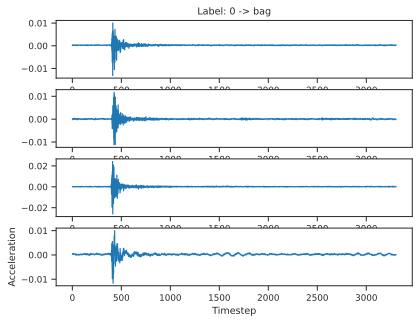

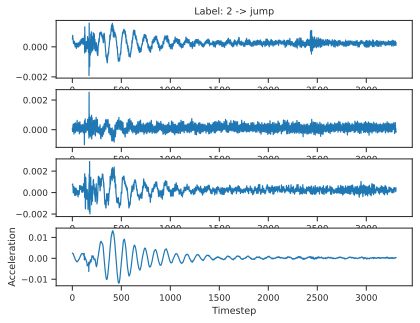

In [ ]:
for _ in range(5):
    i = np.random.randint(0, data['features'].shape[0])
    fig, ax = plt.subplots(4, 1, dpi=100)
    for j in range(4):
        ax[j].plot(data['features'][i, j])
    ax[-1].set_xlabel('Timestep')
    ax[-1].set_ylabel('Acceleration')
    ax[0].set_title('Label: {0:d} -> {1:s}'.format(data['labels_1'][i],
                                                   LABELS_1_TO_TEXT[data['labels_1'][i]]))

The array `labels_2` includes integers from 0 to 6 indicating the detailed label of the experiment. The correspondence between integers and text labels is:

In [ ]:
LABELS_2_TO_TEXT = {
    0: 'bag-high',
    1: 'bag-low',
    2: 'ball-high',
    3: 'ball-low',
    4: 'd-jump',
    5: 'j-jump',
    6: 'w-jump'
}

Finally, the field `loc_ids` takes values from 0 to 4 indicating five distinct locations in the building.

Before moving forward with the questions, let's extract the data in a more covenient form:

In [ ]:
# The features
X = data['features']
# The labels_1
y1 = data['labels_1']
# The labels_2
y2 = data['labels_2']
# The locations
y3 = data['loc_ids']

### Part A - Train a CNN to predict the high-level type of observation (bag, ball, or jump)

Fill in the blanks in the code blocks below to train a classification neural network that will take you from the four acceleration sensor data to the high-level type of each observation.
You can keep the network structure fixed, but you can experiment with the learning rate, the number of epochs, or anything else.
Just keep in mind that for this particular dataset, it is possible to hit an accuracy of almost 100%.

**Answer:**

The first thing that we need to do is pick a neural network structure.
Let's use 1D convolutional layers at the very beginning.
These are the same as the 2D (image) convolutional layers but in 1D.
The reason I am proposing this is that the convolutional layers are invariant to small translations of the acceleration signal (just like the labels are).
Here is what I propose:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, num_labels=3):
        super(Net, self).__init__()
        # A convolutional layer:
        # 3 = input channels (sensors),
        # 6 = output channels (features),
        # 5 = kernel size
        self.conv1 = nn.Conv1d(4, 8, 10)
        # A 2 x 2 max pooling layer - we are going to use it two times
        self.pool = nn.MaxPool1d(5)
        # Another convolutional layer
        self.conv2 = nn.Conv1d(8, 16, 5)
        # Some linear layers
        self.fc1 = nn.Linear(16 * 131, 200)
        self.fc2 = nn.Linear(200, 50)
        self.fc3 = nn.Linear(50, num_labels)

    def forward(self, x):
        # This function implements your network output
        # Convolutional layer, followed by relu, followed by max pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Same thing
        x = self.pool(F.relu(self.conv2(x)))
        # Flatting the output of the convolutional layers
        x = x.view(-1, 16 * 131)
        # Go throught the first dense linear layer followed by relu
        x = F.relu(self.fc1(x))
        # Through the second dense layer
        x = F.relu(self.fc2(x))
        # Finish up with a linear transformation
        x = self.fc3(x)
        return x

In [ ]:
# You can make the network like this:
net = Net(3)

Now, you need to pick the right loss function for classification tasks:

In [ ]:
cnn_loss_func = nn.CrossEntropyLoss()# your code here

Just like before, let's organize our training code in a convenient function that allows us to play with the parameters of training.
Fill in the missing code.

In [ ]:
def train_cnn(X, y, net, n_batch, epochs, lr, test_size=0.33):
    """
    A function that trains a regression neural network using stochastic gradient
    descent and returns the trained network. The loss function being minimized is
    `loss_func`.

    Parameters:

    X          -    The observed features
    y          -    The observed targets
    net        -    The network you want to fit
    n_batch    -    The batch size you want to use for stochastic optimization
    epochs     -    How many times do you want to pass over the training dataset.
    lr         -    The learning rate for the stochastic optimization algorithm.
    test_size  -    What percentage of the data should be used for testing (validation).
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    # Turn all the numpy arrays to torch tensors
    X_train = torch.Tensor(X_train)
    X_test = torch.Tensor(X_test)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)

    # This is pytorch magick to enable shuffling of the
    # training data every time we go through them
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_data_loader = torch.utils.data.DataLoader(train_dataset,
                                                    batch_size=n_batch,
                                                    shuffle=True)

    # Create an Adam optimizing object for the neural network `net`
    # with learning rate `lr`
    # raise NotImplementedError('Define the optimizer object! Delete me then!')
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)# your code here

    # This is a place to keep track of the test loss
    test_loss = []
    # This is a place to keep track of the accuracy on each epoch
    accuracy = []

    # Iterate the optimizer.
    # Remember, each time we go through the entire dataset we complete an `epoch`
    # I have wrapped the range around tqdm to give you a nice progress bar
    # to look at
    for e in tqdm(range(epochs)):
        # This loop goes over all the shuffled training data
        # That's why the DataLoader class of PyTorch is convenient
        running_loss = 0.0
        for X_batch, y_batch in train_data_loader:
            # Perform a single optimization step with loss function
            # cnn_loss_func(y_batch, y_pred, reg_weight)
            # Hint 1: You have defined cnn_loss_func() already
            # Hint 2: Consult the hands-on activities for an example
            # your code here
            # raise NotImplementedError('Write stochastic gradient step code! Delete me then!')
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(X_batch)
            loss = cnn_loss_func(outputs, y_batch)
            loss.backward()
            optimizer.step()
            # print statistics
            running_loss += loss.item()

        # Evaluate the test loss and append it on the list `test_loss`
        y_pred_test = net(X_test)
        ts_loss = cnn_loss_func(y_pred_test, y_test)
        test_loss.append(ts_loss.item())
        # Evaluate the accuracy
        _, predicted = torch.max(y_pred_test.data, 1)
        correct = (predicted == y_test).sum().item()
        accuracy.append(correct / y_test.shape[0])
        # Print something about the accuracy
        print('Epoch {0:d}: accuracy = {1:1.5f}%'.format(e+1, accuracy[-1]))
    trained_model = net

    # Return everything we need to analyze the results
    return trained_model, test_loss, accuracy, X_train, y_train, X_test, y_test

Now experiment with the epochs, the learning rate, and the batch size until this works.

In [ ]:
epochs = 10
lr = 0.01
n_batch = 100
trained_model, test_loss, accuracy, X_train, y_train, X_test, y_test = train_cnn(X, y1, net, n_batch, epochs, lr)

 10%|█         | 1/10 [00:03<00:30,  3.40s/it]

Epoch 1: accuracy = 0.42212%


 20%|██        | 2/10 [00:06<00:25,  3.19s/it]

Epoch 2: accuracy = 0.42212%


 30%|███       | 3/10 [00:10<00:24,  3.51s/it]

Epoch 3: accuracy = 0.69074%


 40%|████      | 4/10 [00:13<00:19,  3.28s/it]

Epoch 4: accuracy = 0.97291%


 50%|█████     | 5/10 [00:16<00:15,  3.10s/it]

Epoch 5: accuracy = 0.99624%


 60%|██████    | 6/10 [00:18<00:12,  3.02s/it]

Epoch 6: accuracy = 0.97893%


 70%|███████   | 7/10 [00:22<00:09,  3.08s/it]

Epoch 7: accuracy = 0.99398%


 80%|████████  | 8/10 [00:25<00:06,  3.28s/it]

Epoch 8: accuracy = 0.99774%


 90%|█████████ | 9/10 [00:28<00:03,  3.12s/it]

Epoch 9: accuracy = 0.99774%


100%|██████████| 10/10 [00:31<00:00,  3.14s/it]

Epoch 10: accuracy = 0.99699%


Plot the evolution of the test loss as a function of epochs.

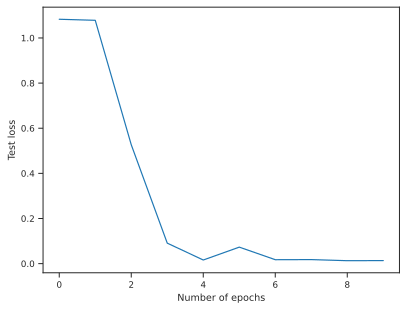

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(test_loss)
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss');

Plot the evolution of the accuracy as a function of epochs.

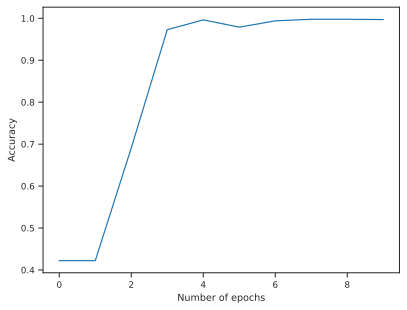

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(accuracy)
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Accuracy');

Plot the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
# Predict on the test data
y_pred_test = trained_model(X_test)
# Remember that the prediction is probabilistic
# We need to simply pick the label with the highest probability:
_, y_pred_labels = torch.max(y_pred_test, 1)
# Here is the confusion matrix:
cf_matrix = confusion_matrix(y_test, y_pred_labels)

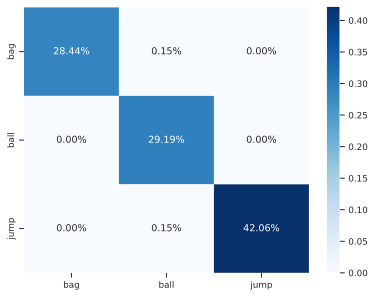

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues',
            xticklabels=LABELS_1_TO_TEXT.values(),
            yticklabels=LABELS_1_TO_TEXT.values());

### Part B - Train a CNN to predict the the low-level type of observation (bag-high, bag-low, etc.)

Repeat what you did above for `y2`.

**Answer:**

In [ ]:
# your code here
net2 = Net(7)
epochs = 100
lr = 0.001
n_batch = 64
trained_model, test_loss, accuracy, X_train, y_train, X_test, y_test = train_cnn(X, y2, net2, n_batch, epochs, lr)

  1%|          | 1/100 [00:05<08:29,  5.15s/it]

Epoch 1: accuracy = 0.12641%


  2%|▏         | 2/100 [00:08<06:28,  3.97s/it]

Epoch 2: accuracy = 0.12641%


  3%|▎         | 3/100 [00:11<06:02,  3.74s/it]

Epoch 3: accuracy = 0.15049%


  4%|▍         | 4/100 [00:15<06:09,  3.85s/it]

Epoch 4: accuracy = 0.49436%


  5%|▌         | 5/100 [00:18<05:43,  3.62s/it]

Epoch 5: accuracy = 0.44846%


  6%|▌         | 6/100 [00:22<05:26,  3.48s/it]

Epoch 6: accuracy = 0.53424%


  7%|▋         | 7/100 [00:25<05:19,  3.44s/it]

Epoch 7: accuracy = 0.53725%


  8%|▊         | 8/100 [00:29<05:38,  3.68s/it]

Epoch 8: accuracy = 0.59970%


  9%|▉         | 9/100 [00:32<05:21,  3.53s/it]

Epoch 9: accuracy = 0.62679%


 10%|█         | 10/100 [00:36<05:08,  3.43s/it]

Epoch 10: accuracy = 0.62980%


 11%|█         | 11/100 [00:39<04:59,  3.36s/it]

Epoch 11: accuracy = 0.68623%


 12%|█▏        | 12/100 [00:43<05:19,  3.64s/it]

Epoch 12: accuracy = 0.68698%


 13%|█▎        | 13/100 [00:46<05:07,  3.53s/it]

Epoch 13: accuracy = 0.71031%


 14%|█▍        | 14/100 [00:50<04:54,  3.43s/it]

Epoch 14: accuracy = 0.75696%


 15%|█▌        | 15/100 [00:53<04:45,  3.36s/it]

Epoch 15: accuracy = 0.66516%


 16%|█▌        | 16/100 [00:57<05:03,  3.61s/it]

Epoch 16: accuracy = 0.75395%


 17%|█▋        | 17/100 [01:00<04:56,  3.58s/it]

Epoch 17: accuracy = 0.75546%


 18%|█▊        | 18/100 [01:04<04:48,  3.52s/it]

Epoch 18: accuracy = 0.81565%


 19%|█▉        | 19/100 [01:07<04:41,  3.47s/it]

Epoch 19: accuracy = 0.80888%


 20%|██        | 20/100 [01:12<04:58,  3.73s/it]

Epoch 20: accuracy = 0.81490%


 21%|██        | 21/100 [01:15<04:49,  3.66s/it]

Epoch 21: accuracy = 0.83446%


 22%|██▏       | 22/100 [01:18<04:37,  3.56s/it]

Epoch 22: accuracy = 0.84575%


 23%|██▎       | 23/100 [01:22<04:29,  3.50s/it]

Epoch 23: accuracy = 0.82318%


 24%|██▍       | 24/100 [01:26<04:45,  3.75s/it]

Epoch 24: accuracy = 0.82393%


 25%|██▌       | 25/100 [01:29<04:33,  3.64s/it]

Epoch 25: accuracy = 0.79233%


 26%|██▌       | 26/100 [01:33<04:22,  3.55s/it]

Epoch 26: accuracy = 0.86230%


 27%|██▋       | 27/100 [01:36<04:14,  3.48s/it]

Epoch 27: accuracy = 0.86155%


 28%|██▊       | 28/100 [01:41<04:30,  3.75s/it]

Epoch 28: accuracy = 0.86682%


 29%|██▉       | 29/100 [01:44<04:19,  3.66s/it]

Epoch 29: accuracy = 0.86381%


 30%|███       | 30/100 [01:47<04:09,  3.57s/it]

Epoch 30: accuracy = 0.84951%


 31%|███       | 31/100 [01:51<04:01,  3.50s/it]

Epoch 31: accuracy = 0.88111%


 32%|███▏      | 32/100 [01:55<04:16,  3.78s/it]

Epoch 32: accuracy = 0.89090%


 33%|███▎      | 33/100 [01:59<04:06,  3.68s/it]

Epoch 33: accuracy = 0.88488%


 34%|███▍      | 34/100 [02:02<03:56,  3.59s/it]

Epoch 34: accuracy = 0.89315%


 35%|███▌      | 35/100 [02:05<03:48,  3.51s/it]

Epoch 35: accuracy = 0.89240%


 36%|███▌      | 36/100 [02:10<04:02,  3.79s/it]

Epoch 36: accuracy = 0.88262%


 37%|███▋      | 37/100 [02:13<03:50,  3.66s/it]

Epoch 37: accuracy = 0.89090%


 38%|███▊      | 38/100 [02:16<03:41,  3.57s/it]

Epoch 38: accuracy = 0.88488%


 39%|███▉      | 39/100 [02:20<03:34,  3.52s/it]

Epoch 39: accuracy = 0.88638%


 40%|████      | 40/100 [02:24<03:46,  3.78s/it]

Epoch 40: accuracy = 0.89391%


 41%|████      | 41/100 [02:28<03:35,  3.66s/it]

Epoch 41: accuracy = 0.88563%


 42%|████▏     | 42/100 [02:31<03:26,  3.57s/it]

Epoch 42: accuracy = 0.88789%


 43%|████▎     | 43/100 [02:34<03:21,  3.54s/it]

Epoch 43: accuracy = 0.89616%


 44%|████▍     | 44/100 [02:39<03:30,  3.76s/it]

Epoch 44: accuracy = 0.89767%


 45%|████▌     | 45/100 [02:42<03:19,  3.63s/it]

Epoch 45: accuracy = 0.87961%


 46%|████▌     | 46/100 [02:45<03:11,  3.55s/it]

Epoch 46: accuracy = 0.87886%


 47%|████▋     | 47/100 [02:49<03:07,  3.53s/it]

Epoch 47: accuracy = 0.86682%


 48%|████▊     | 48/100 [02:53<03:15,  3.76s/it]

Epoch 48: accuracy = 0.88337%


 49%|████▉     | 49/100 [02:57<03:06,  3.65s/it]

Epoch 49: accuracy = 0.91121%


 50%|█████     | 50/100 [03:00<02:58,  3.58s/it]

Epoch 50: accuracy = 0.90218%


 51%|█████     | 51/100 [03:04<02:55,  3.58s/it]

Epoch 51: accuracy = 0.89616%


 52%|█████▏    | 52/100 [03:08<03:01,  3.78s/it]

Epoch 52: accuracy = 0.89917%


 53%|█████▎    | 53/100 [03:11<02:50,  3.62s/it]

Epoch 53: accuracy = 0.90369%


 54%|█████▍    | 54/100 [03:14<02:42,  3.52s/it]

Epoch 54: accuracy = 0.91723%


 55%|█████▌    | 55/100 [03:18<02:38,  3.51s/it]

Epoch 55: accuracy = 0.86230%


 56%|█████▌    | 56/100 [03:22<02:43,  3.72s/it]

Epoch 56: accuracy = 0.91422%


 57%|█████▋    | 57/100 [03:25<02:34,  3.59s/it]

Epoch 57: accuracy = 0.90369%


 58%|█████▊    | 58/100 [03:29<02:27,  3.50s/it]

Epoch 58: accuracy = 0.90820%


 59%|█████▉    | 59/100 [03:32<02:22,  3.48s/it]

Epoch 59: accuracy = 0.87886%


 60%|██████    | 60/100 [03:36<02:28,  3.70s/it]

Epoch 60: accuracy = 0.88638%


 61%|██████    | 61/100 [03:39<02:18,  3.54s/it]

Epoch 61: accuracy = 0.90218%


 62%|██████▏   | 62/100 [03:43<02:11,  3.45s/it]

Epoch 62: accuracy = 0.91949%


 63%|██████▎   | 63/100 [03:46<02:05,  3.39s/it]

Epoch 63: accuracy = 0.91723%


 64%|██████▍   | 64/100 [03:50<02:11,  3.66s/it]

Epoch 64: accuracy = 0.88488%


 65%|██████▌   | 65/100 [03:53<02:03,  3.52s/it]

Epoch 65: accuracy = 0.91196%


 66%|██████▌   | 66/100 [03:57<01:57,  3.44s/it]

Epoch 66: accuracy = 0.92250%


 67%|██████▋   | 67/100 [04:00<01:52,  3.40s/it]

Epoch 67: accuracy = 0.89240%


 68%|██████▊   | 68/100 [04:04<01:58,  3.69s/it]

Epoch 68: accuracy = 0.91874%


 69%|██████▉   | 69/100 [04:10<02:11,  4.23s/it]

Epoch 69: accuracy = 0.90820%


 70%|███████   | 70/100 [04:16<02:21,  4.71s/it]

Epoch 70: accuracy = 0.91874%


 71%|███████   | 71/100 [04:22<02:30,  5.17s/it]

Epoch 71: accuracy = 0.86531%


 72%|███████▏  | 72/100 [04:25<02:09,  4.62s/it]

Epoch 72: accuracy = 0.92476%


 73%|███████▎  | 73/100 [04:29<01:54,  4.23s/it]

Epoch 73: accuracy = 0.92927%


 74%|███████▍  | 74/100 [04:33<01:49,  4.22s/it]

Epoch 74: accuracy = 0.91648%


 75%|███████▌  | 75/100 [04:38<01:53,  4.53s/it]

Epoch 75: accuracy = 0.89014%


 76%|███████▌  | 76/100 [04:41<01:39,  4.16s/it]

Epoch 76: accuracy = 0.92777%


 77%|███████▋  | 77/100 [04:45<01:31,  3.99s/it]

Epoch 77: accuracy = 0.92551%


 78%|███████▊  | 78/100 [04:49<01:28,  4.03s/it]

Epoch 78: accuracy = 0.91949%


 79%|███████▉  | 79/100 [04:52<01:20,  3.82s/it]

Epoch 79: accuracy = 0.92024%


 80%|████████  | 80/100 [04:56<01:13,  3.68s/it]

Epoch 80: accuracy = 0.92852%


 81%|████████  | 81/100 [04:59<01:09,  3.66s/it]

Epoch 81: accuracy = 0.93078%


 82%|████████▏ | 82/100 [05:03<01:08,  3.81s/it]

Epoch 82: accuracy = 0.92777%


 83%|████████▎ | 83/100 [05:07<01:02,  3.67s/it]

Epoch 83: accuracy = 0.91497%


 84%|████████▍ | 84/100 [05:10<00:56,  3.55s/it]

Epoch 84: accuracy = 0.91723%


 85%|████████▌ | 85/100 [05:14<00:53,  3.55s/it]

Epoch 85: accuracy = 0.91949%


 86%|████████▌ | 86/100 [05:18<00:52,  3.74s/it]

Epoch 86: accuracy = 0.89090%


 87%|████████▋ | 87/100 [05:21<00:46,  3.60s/it]

Epoch 87: accuracy = 0.91874%


 88%|████████▊ | 88/100 [05:24<00:42,  3.52s/it]

Epoch 88: accuracy = 0.90895%


 89%|████████▉ | 89/100 [05:28<00:39,  3.55s/it]

Epoch 89: accuracy = 0.93153%


 90%|█████████ | 90/100 [05:32<00:37,  3.75s/it]

Epoch 90: accuracy = 0.91121%


 91%|█████████ | 91/100 [05:36<00:32,  3.61s/it]

Epoch 91: accuracy = 0.93002%


 92%|█████████▏| 92/100 [05:39<00:28,  3.52s/it]

Epoch 92: accuracy = 0.91121%


 93%|█████████▎| 93/100 [05:42<00:24,  3.52s/it]

Epoch 93: accuracy = 0.93303%


 94%|█████████▍| 94/100 [05:47<00:22,  3.72s/it]

Epoch 94: accuracy = 0.92099%


 95%|█████████▌| 95/100 [05:50<00:17,  3.59s/it]

Epoch 95: accuracy = 0.91196%


 96%|█████████▌| 96/100 [05:53<00:14,  3.51s/it]

Epoch 96: accuracy = 0.92325%


 97%|█████████▋| 97/100 [05:57<00:10,  3.51s/it]

Epoch 97: accuracy = 0.92024%


 98%|█████████▊| 98/100 [06:02<00:07,  3.93s/it]

Epoch 98: accuracy = 0.92175%


 99%|█████████▉| 99/100 [06:05<00:03,  3.76s/it]

Epoch 99: accuracy = 0.91497%


100%|██████████| 100/100 [06:08<00:00,  3.69s/it]

Epoch 100: accuracy = 0.92400%


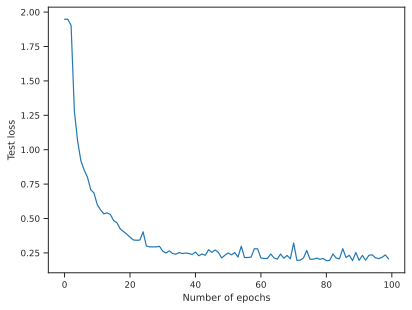

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(test_loss)
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss');

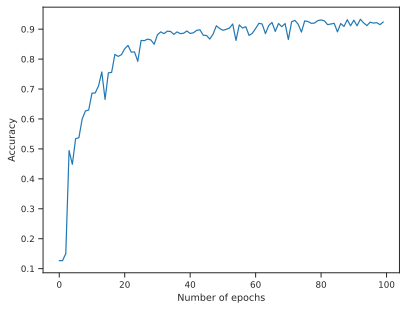

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(accuracy)
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Accuracy');

In [ ]:
from sklearn.metrics import confusion_matrix
# Predict on the test data
y_pred_test = trained_model(X_test)
# Remember that the prediction is probabilistic
# We need to simply pick the label with the highest probability:
_, y_pred_labels = torch.max(y_pred_test, 1)
# Here is the confusion matrix:
cf_matrix = confusion_matrix(y_test, y_pred_labels)

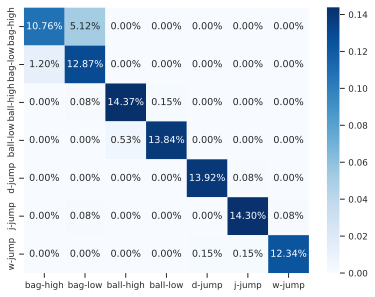

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues',
            xticklabels=LABELS_2_TO_TEXT.values(),
            yticklabels=LABELS_2_TO_TEXT.values());